### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


#### Domain 
Internet and Entertainment

Data Source : https://grouplens.org/datasets/movielens/100k/

#### Hypothesis :
 * Men watch more Romance than women
 * Women watch more Sci-Fi
 * Men watch more Drama than women

#### Tasks :
* Import data files into working juypter notebooks
* Perform Univariate analysis especially on 'rating', 'age', release date', 'gender' and 'occupation'
* Visualize how popularity of genres has changed over the years.  Also display which movie genre got released the most for a given year.
* Display top 25 movies by average rating, as a list/series/dataframe (Ignore movies with less than 100 ratings)

#### 1. Import the necessary packages 

In [109]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### 2. Read the datasets into dataframes 

In [111]:
ratings = pd.read_csv('./ml-100k/u.data',sep='\t',
                      names=['UserID','ItemID','rating','Timestamp'])
print(ratings.head())
print(ratings.shape)

   UserID  ItemID  rating  Timestamp
0     196     242       3  881250949
1     186     302       3  891717742
2      22     377       1  878887116
3     244      51       2  880606923
4     166     346       1  886397596
(100000, 4)


In [113]:
users = pd.read_csv('./ml-100k/u.user', sep='|', 
                    names=['UserID','Age','Gender','Occupation','Zip-code'])
print(users.shape)
users.head()

(943, 5)


,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [114]:
## Create a list of column names which can be found from README file
col_n = ['ItemID','movie title','release date','video release date','IMDb URL',
         'unknown','Action','Adventure','Animation',
'Childrens','Comedy','Crime','Documentary','Drama','Fantasy',
'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
'Thriller','War','Western']
movies = pd.read_csv('./ml-100k/u.item',sep='|',encoding = 'latin-1',names=col_n)

print(movies.shape)
display(movies.head())

(1682, 24)


,ItemID,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
movies.head()

,ItemID,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 3. Apply info, shape, describe, and find the number of missing values in the data 

In [116]:
#movies
print(movies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ItemID              1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [117]:
#ratings
print(ratings.describe())

             UserID         ItemID         rating     Timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


In [118]:
#user
print(users.shape)

(943, 5)


In [121]:
#Missing values
movies.isna().sum()

ItemID                   0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Childrens                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [122]:
# drop missing values
movies.drop(columns=['video release date','IMDb URL'],inplace=True)

In [123]:
movies.isna().sum()

ItemID          0
movie title     0
release date    1
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [124]:
movies[movies['release date'].isna()]

,ItemID,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
movies.dropna(inplace=True)

In [126]:
movies.isna().sum()

ItemID          0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [127]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ItemID        1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

#### 4. Find the number of movies per genre using the item data 

In [128]:
##1
movies[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [130]:
##2
movies.loc[:,'Action':].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [131]:
movies.head()

,ItemID,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### 5. Find the movies that have more than one genre 

In [ ]:
#hint: use sum on the axis = 1
temp_movies = movies[['ItemID','movie title']]

In [132]:
temp_movies['Num genre']= movies[['movie title','unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=1)

In [133]:
temp_movies['Num genre'].head()

0    3
1    3
2    1
3    3
4    3
Name: Num genre, dtype: int64

In [134]:
temp_movies[temp_movies['Num genre']>1].head()

,ItemID,movie title,Num genre
0,1,Toy Story (1995),3
1,2,GoldenEye (1995),3
3,4,Get Shorty (1995),3
4,5,Copycat (1995),3
6,7,Twelve Monkeys (1995),2


#### 6. Drop the movie where the genre is unknown 

In [135]:
movies.drop(columns='unknown',inplace=True)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' 

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [136]:
a = 'My*cat*is*brown'
a[-5:]


'brown'

<AxesSubplot:xlabel='rating', ylabel='count'>

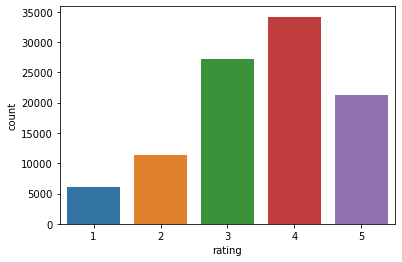

In [137]:
sns.countplot(ratings['rating'])

<AxesSubplot:xlabel='Age'>

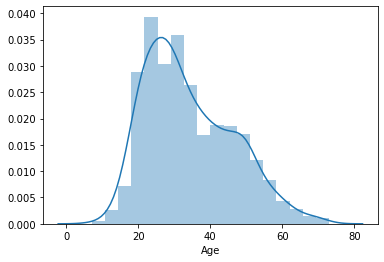

In [139]:
sns.distplot(users['Age'])

In [144]:
movies['release date'].str.split('-',expand=True)[2]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1677    1998
1678    1998
1679    1998
1680    1994
1681    1996
Name: 2, Length: 1681, dtype: object

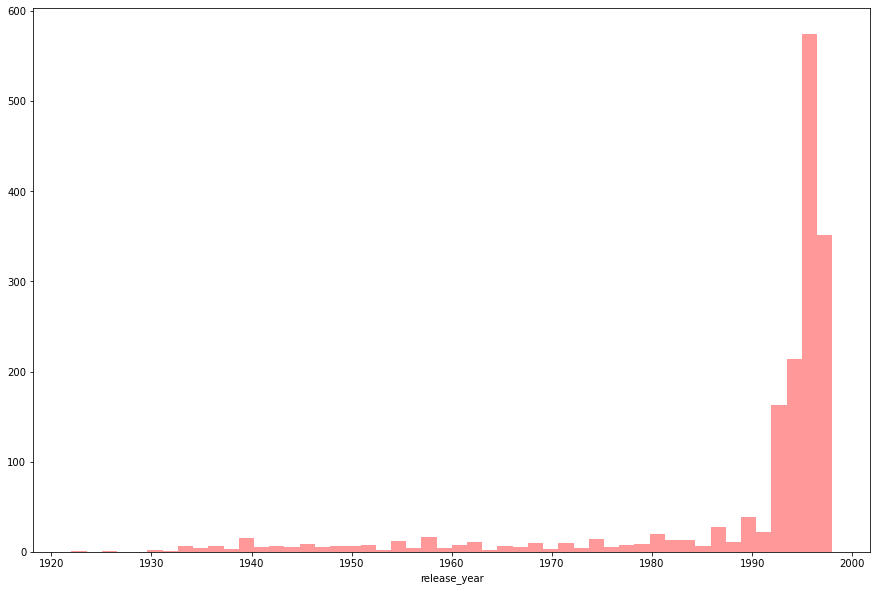

In [145]:
plt.figure(figsize=(15,10))
movies['release_year']=movies['release date'].str.split('-',expand=True)[2]
movies['release_year']= movies['release_year'].astype(int)
sns.distplot(movies.release_year,color='red',kde=False)
plt.show()

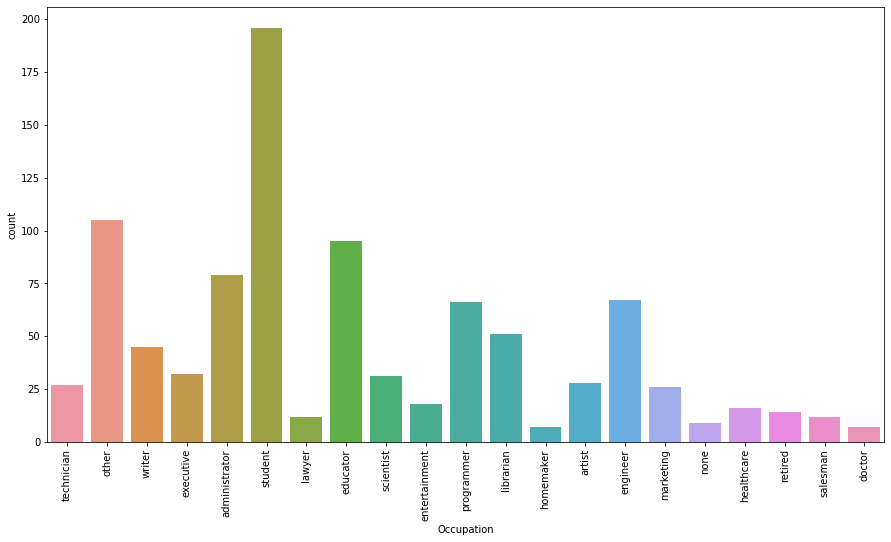

In [146]:
plt.figure(figsize=(15,8))
sns.countplot(users['Occupation'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

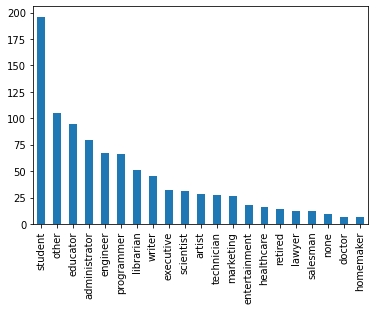

In [148]:
users['Occupation'].value_counts().plot.bar()



### 8. Visualize how popularity of genres has changed over the years 
Note that you need to use the number of releases in a year as a parameter of popularity of a genre

In [151]:
genre_by_year = movies.groupby('release_year').sum().drop(columns='ItemID')

In [153]:
genre_by_year.T

release_year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


In [167]:
test = genre_by_year

In [169]:
test = test.reset_index()

In [170]:
test.head()

,release_year,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [176]:
test = genre_by_year.T/genre_by_year.sum(axis=1)*100

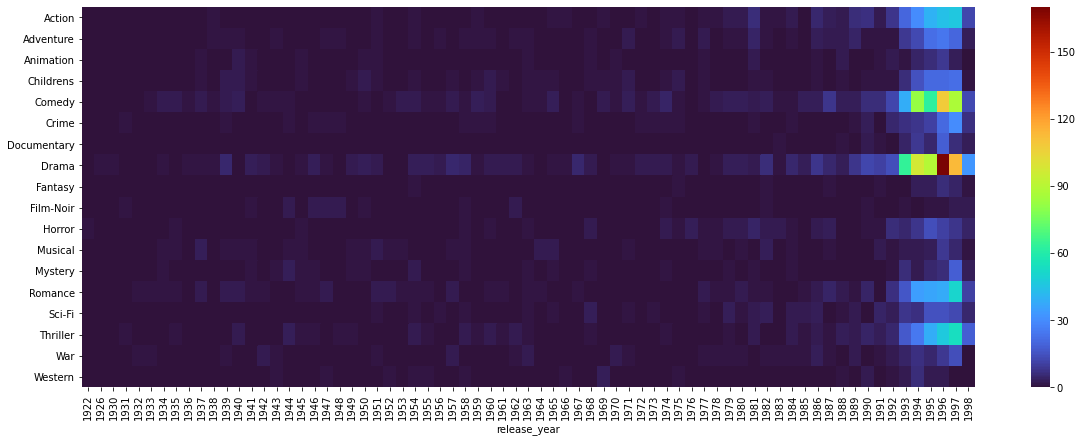

In [178]:
plt.figure(figsize=(20,7))
sns.heatmap(genre_by_year.T,cmap='turbo')
plt.show()

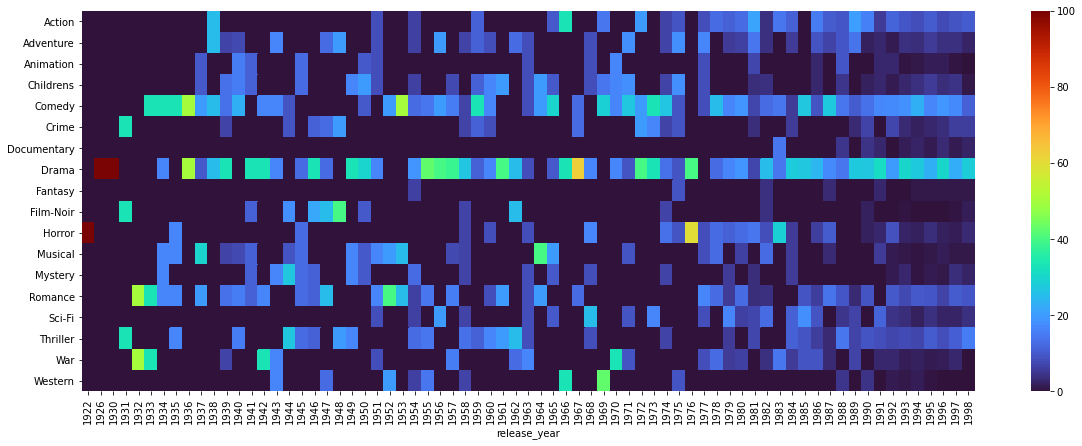

In [177]:
plt.figure(figsize=(20,7))
sns.heatmap(test,cmap='turbo')
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [179]:
ratings.columns

Index(['UserID', 'ItemID', 'rating', 'Timestamp'], dtype='object')

In [180]:
ud  = users.merge(ratings,on='UserID',how='inner')
df = movies.merge(ud,on='ItemID',how='inner')
df.head()

,ItemID,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,War,Western,release_year,UserID,Age,Gender,Occupation,Zip-code,rating,Timestamp
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,1,24,M,technician,85711,5,874965758
1,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,2,53,F,other,94043,4,888550871
2,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,5,33,F,other,15213,4,875635748
3,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,6,42,M,executive,98101,4,883599478
4,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,1995,10,53,M,lawyer,90703,4,877888877


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ItemID        99991 non-null  int64 
 1   movie title   99991 non-null  object
 2   release date  99991 non-null  object
 3   Action        99991 non-null  int64 
 4   Adventure     99991 non-null  int64 
 5   Animation     99991 non-null  int64 
 6   Childrens     99991 non-null  int64 
 7   Comedy        99991 non-null  int64 
 8   Crime         99991 non-null  int64 
 9   Documentary   99991 non-null  int64 
 10  Drama         99991 non-null  int64 
 11  Fantasy       99991 non-null  int64 
 12  Film-Noir     99991 non-null  int64 
 13  Horror        99991 non-null  int64 
 14  Musical       99991 non-null  int64 
 15  Mystery       99991 non-null  int64 
 16  Romance       99991 non-null  int64 
 17  Sci-Fi        99991 non-null  int64 
 18  Thriller      99991 non-null  int64 
 19  War 

In [186]:
temp_movies = df.groupby(['ItemID','movie title'])['rating'].count().reset_index()
movies_t = list(temp_movies[temp_movies['rating']>100]['ItemID'])

In [191]:
avg_rating = df.groupby(['ItemID','movie title'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating[avg_rating['ItemID'].isin(movies_t)].head(25)

,ItemID,movie title,rating
15,408,"Close Shave, A (1995)",4.491071
16,318,Schindler's List (1993),4.466443
17,169,"Wrong Trousers, The (1993)",4.466102
18,483,Casablanca (1942),4.456790
20,64,"Shawshank Redemption, The (1994)",4.445230
21,603,Rear Window (1954),4.387560
22,12,"Usual Suspects, The (1995)",4.385768
23,50,Star Wars (1977),4.358491
24,178,12 Angry Men (1957),4.344000
28,134,Citizen Kane (1941),4.292929


### 10. See gender distribution across different genres check for the validity of the below statements 

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


In [192]:
movies.columns

Index(['ItemID', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [193]:
users.columns

Index(['UserID', 'Age', 'Gender', 'Occupation', 'Zip-code'], dtype='object')

In [194]:
ratings.columns

Index(['UserID', 'ItemID', 'rating', 'Timestamp'], dtype='object')

In [212]:
df.groupby('Gender').sum()

,ItemID,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,...,Romance,Sci-Fi,Thriller,War,Western,release_year,UserID,Age,rating,Timestamp
Gender,,,,,,,,,,,,,,,,,,,,,
F,11452645,5442,3141,995,2232,8068,1794,187,11008,363,...,5858,2629,5086,2189,371,51177156,12225832,831719,90894,22748573259055
M,31097965,20147,10612,2610,4950,21764,6261,571,28887,989,...,13603,10101,16786,7209,1483,147600574,34019836,2465018,262061,65596431148640


In [197]:
#Group by gender and aggregate with sum and select all the genre columns 
Genre_by_gender = df.groupby('Gender').sum().loc[:,'Action':'Western']

In [198]:
 #Row total of the dataframe
Genre_by_gender['total'] = df['Gender'].value_counts()

In [199]:
Genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,25738
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,74253


In [203]:
 #dividing each cell with row total and multiplying by 100
Genre_by_gender = Genre_by_gender.div(Genre_by_gender.total,axis=0)*100

In [211]:
Genre_by_gender.loc[:,'Action':'Western']

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Gender,,,,,,,,,,,,,,,,,,
F,21.143834,12.203745,3.865879,8.672002,31.346647,6.970239,0.726552,42.769446,1.410366,1.495843,4.650711,5.602611,5.105292,22.760121,10.214469,19.760665,8.504934,1.441448
M,27.132910,14.291678,3.515009,6.666397,29.310600,8.431983,0.768992,38.903479,1.331933,1.815415,5.548597,4.729775,5.294062,18.319799,13.603491,22.606494,9.708699,1.997226


In [204]:
Genre_by_gender['Drama']

Gender
F    42.769446
M    38.903479
Name: Drama, dtype: float64

In [205]:
Genre_by_gender['Sci-Fi']

Gender
F    10.214469
M    13.603491
Name: Sci-Fi, dtype: float64

In [206]:
Genre_by_gender['Romance']

Gender
F    22.760121
M    18.319799
Name: Romance, dtype: float64

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**Conclusion:**
    
* Of all the ratings given by women 43% were for Drama movies and for Men it was 39%. Therefore the statement is false. Women watch more Drama


* Of all the ratings given by women 10% were for Sci-FI movies and for Men it was 14%. Therefore the statement is false. Men watch more Sci-Fi


* Of all the ratings given by women 23% were for Drama movies and for Men it was 18%. Therefore the statement is false. Women watch more Romance

#####  Answer: All the statements were false. 